<a href="https://colab.research.google.com/github/XTMay/ML_DL/blob/main/Welcome_to_ML_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 欢迎来到 ML/LLM 体验课程

## 🧑‍🏫 关于我 (May)
- 9+ 年软件开发经验 🇨🇳🇯🇵🇺🇸
- 3+ 年教学经验
- CLimbAI Lab 讲师
- AI认知科学 Researcher

## 🧑‍🎓 关于你
- 为什么报名这门课程
- 编程背景和经验，工具使用 (sklearn(Scikit-learn), pytorch, TensorFlow)
- 对AI的了解，ML/DL的理解 （CNN, RNN, Transformer）
- 学习方向和目标

## 机器学习简介（概念介绍）

机器学习（Machine Learning, ML）是一种让计算机通过数据自动学习和改进的技术，广泛应用于分类、回归、聚类和异常检测等任务（pattern）。其核心思想是通过算法从数据中发现模式，而不是通过显式编程。


 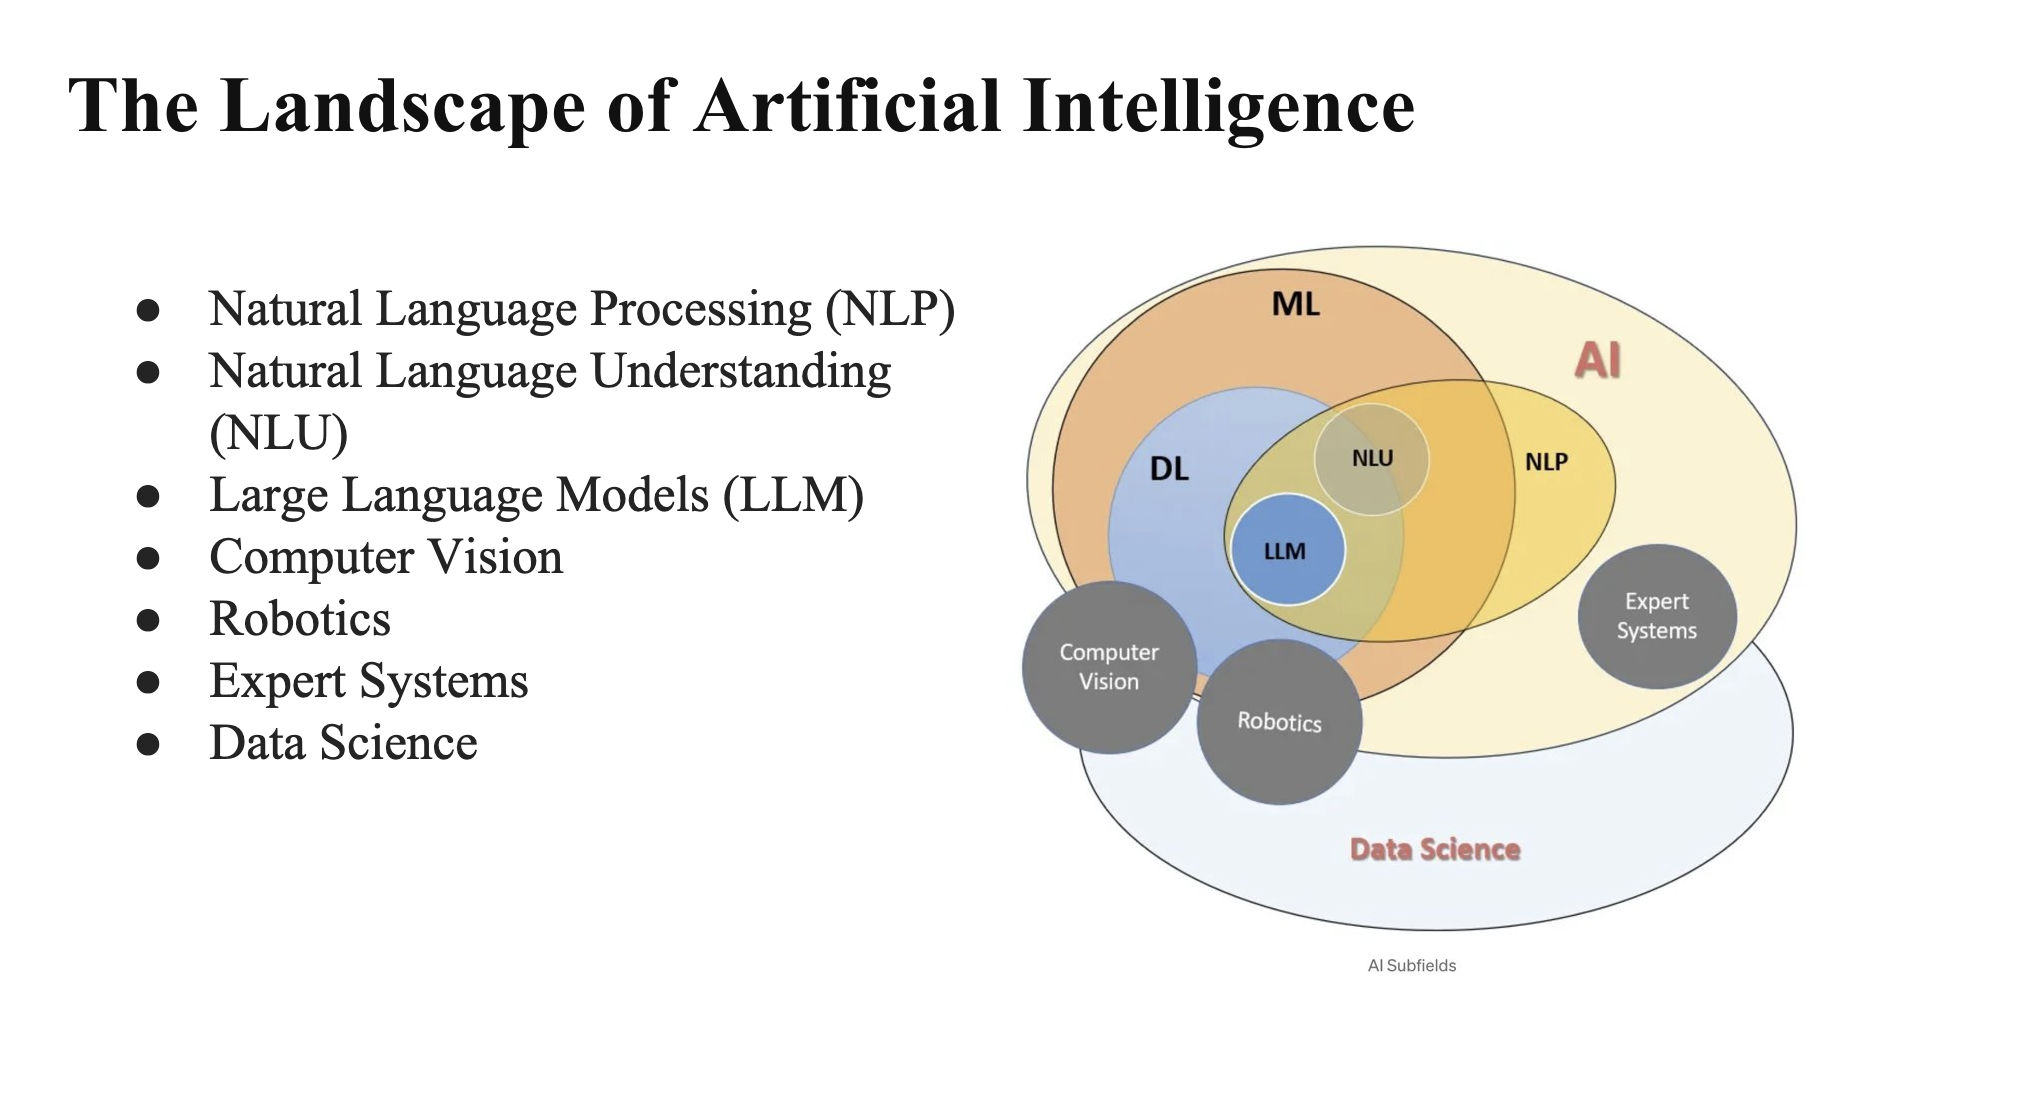


- **监督学习**：利用带标签(label)的数据训练模型，预测新样本的标签。例如，垃圾邮件检测。
- **无监督学习**：不依赖标签，发现数据的内在结构或异常点。例如，异常检测中的异常点识别。

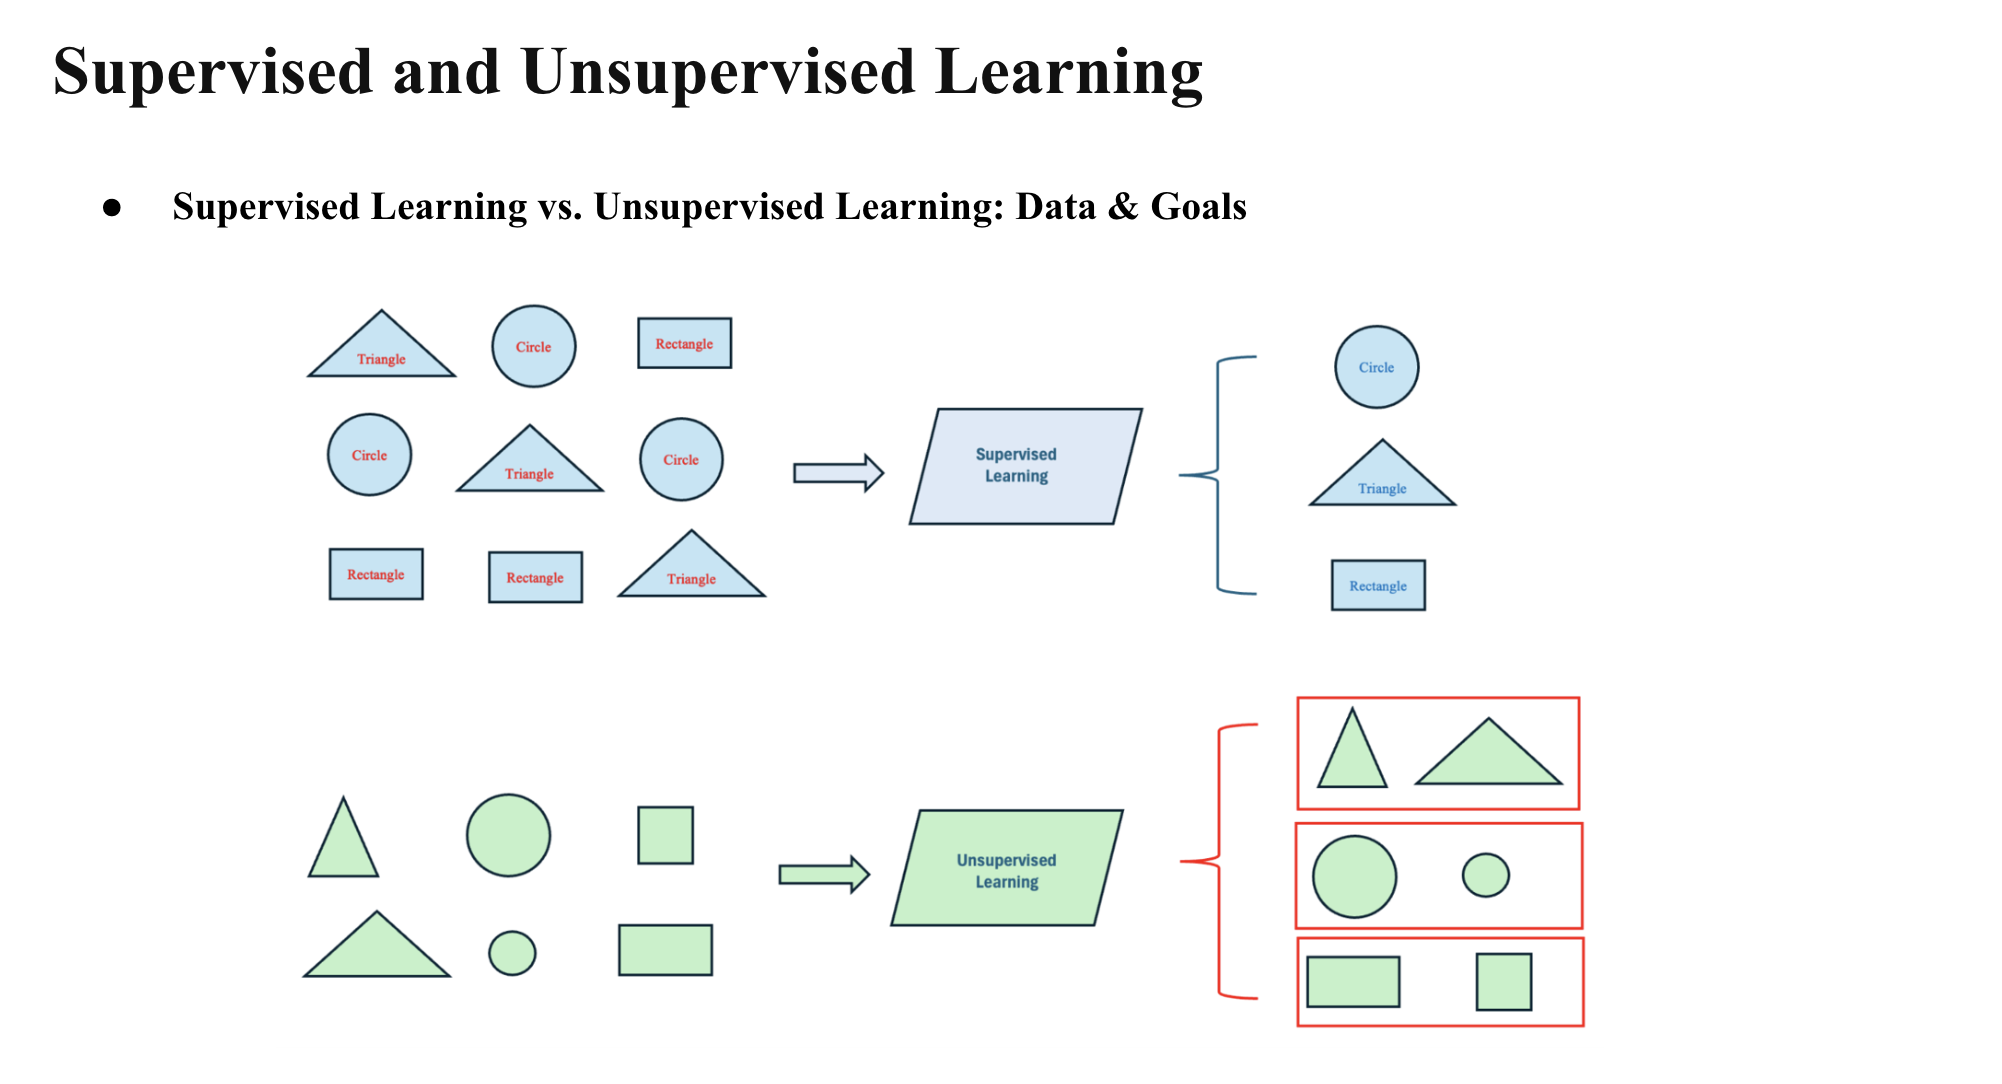

- **常用算法**：
  - 线性回归、逻辑回归
  - 决策树、随机森林
  - 支持向量机（SVM）
  - 神经网络与深度学习
  - 异常检测算法（Isolation Forest、LOF等）


监督学习：

- **分类任务 （Classification）**
- **回归任务 （regression）**

## 数据挖掘 + 机器学习工作流

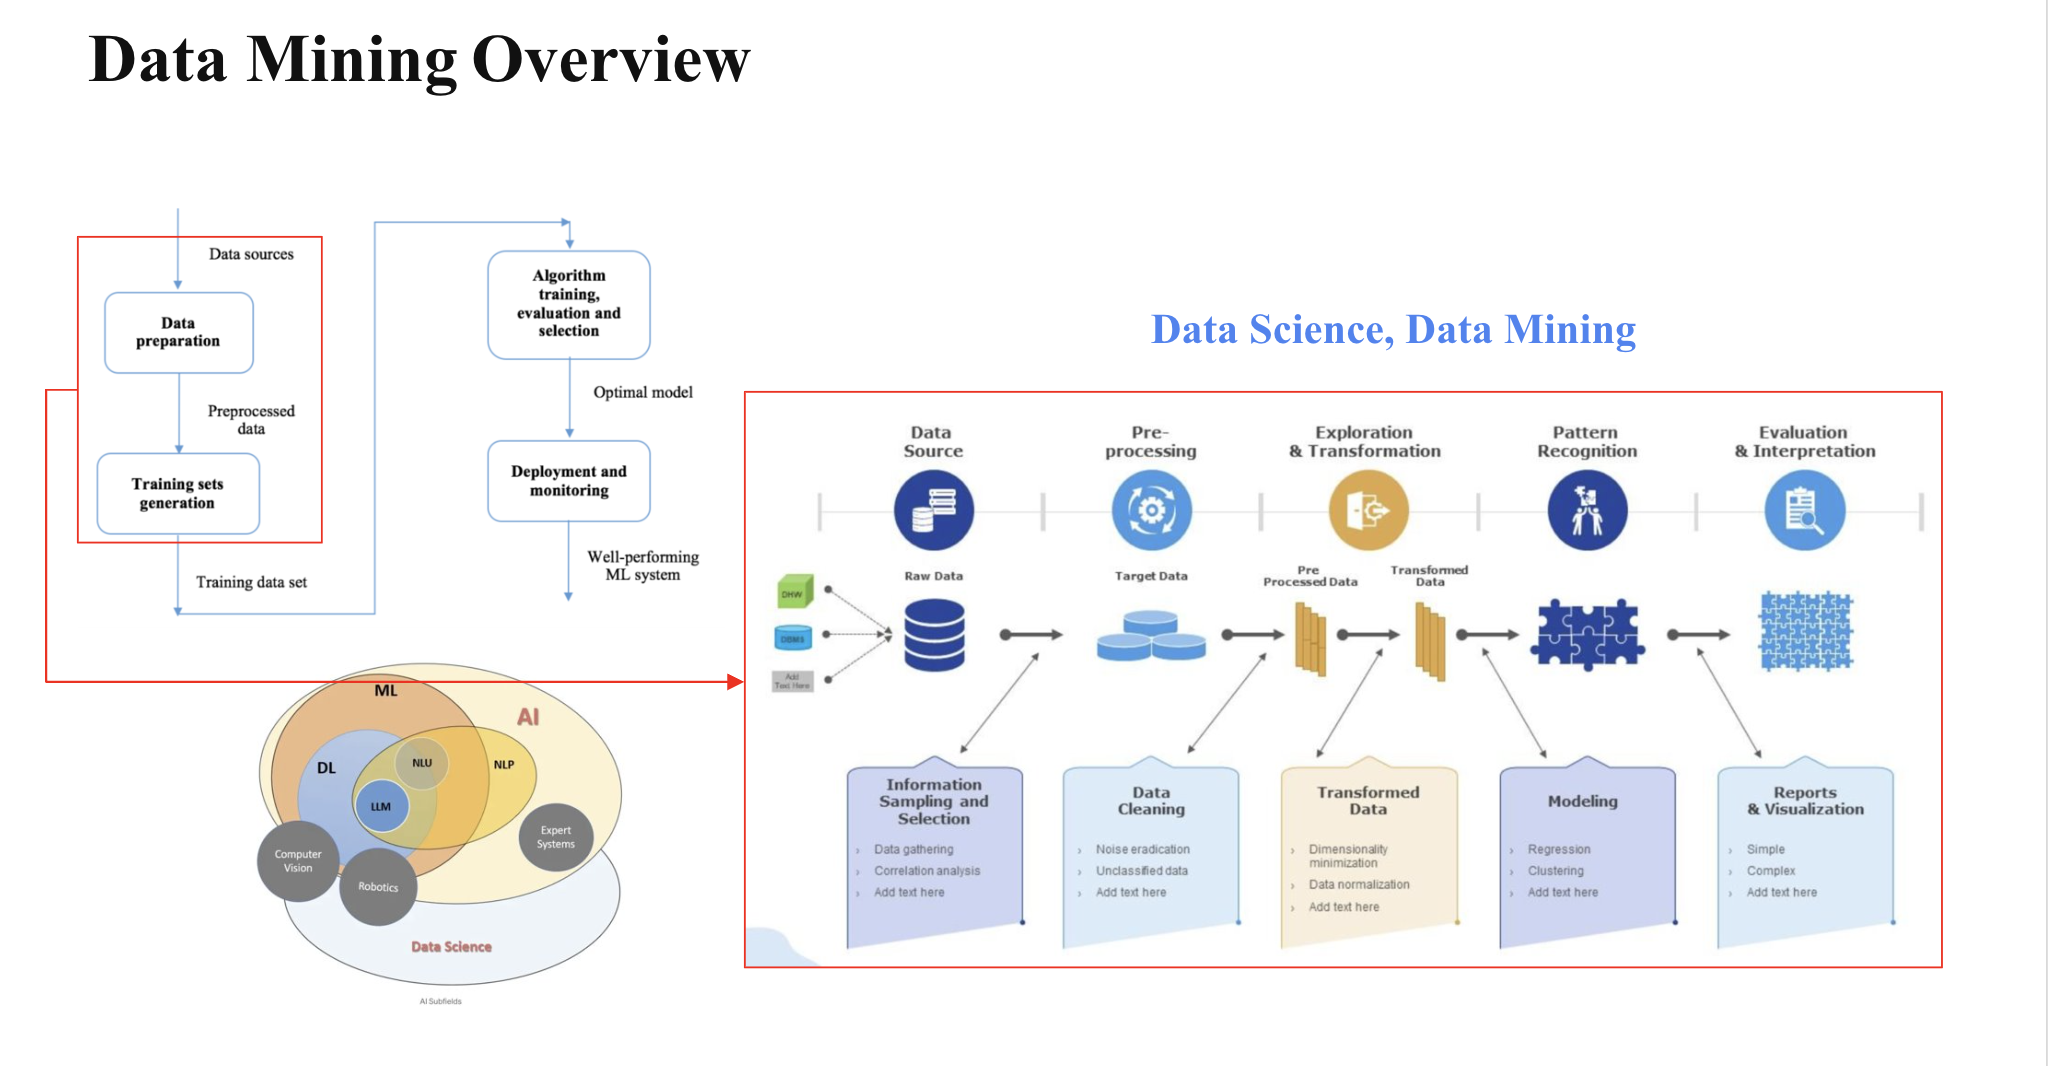

## 经典机器学习实践

我们将使用 sklearn 内置的鸢尾花 (Iris) 数据集，这是一个非常经典的分类任务数据集。

**步骤:**

1.  加载数据集。
2.  划分训练集和测试集。
3.  训练一个简单的分类模型 (例如：决策树)。
4.  进行预测并评估模型性能。

In [8]:
# 导入必要的库
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [9]:
# 1. 加载数据集
iris = load_iris()

X = iris.data  # 特征数据
y = iris.target # 标签数据

feature_names = iris.feature_names
target_names = iris.target_names

In [10]:
print("数据集加载成功！")
print(f"特征数量: {X.shape[1]}")
print(f"样本数量: {X.shape[0]}")
print(f"标签类别: {target_names}")

数据集加载成功！
特征数量: 4
样本数量: 150
标签类别: ['setosa' 'versicolor' 'virginica']


In [11]:
# 将数据转换为 DataFrame 便于查看
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
print("\n数据集前5行:")
display(iris_df.head())


数据集前5行:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



*   打印出数据集的描述信息吗？ (提示: `iris.DESCR`)
*   查看每个类别的样本数量吗？ (提示: 使用 pandas 的 `value_counts()`)

In [15]:
# 2. 划分训练集和测试集
# train_size 表示训练集比例，random_state 用于保证每次划分结果一致
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\n训练集样本数量: {X_train.shape[0]}")
print(f"测试集样本数量: {X_test.shape[0]}")


训练集样本数量: 105
测试集样本数量: 45


In [16]:
# 3. 训练一个简单的决策树分类模型
# 初始化决策树模型
model = DecisionTreeClassifier(random_state=42)

# 使用训练数据拟合模型
model.fit(X_train, y_train)

print("决策树模型训练完成！")

决策树模型训练完成！


In [17]:
# 4. 进行预测并评估模型性能
# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"\n模型在测试集上的准确率: {accuracy:.2f}")

# 打印分类报告 (包含精确率、召回率、F1-score)
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=target_names))


模型在测试集上的准确率: 1.00

分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 小型 LLM 文本生成实验

使用 Hugging Face Transformers 库来加载一个预训练的小型语言模型，并进行文本生成。

我们将使用 `pipeline` 功能，它可以非常方便地调用预训练模型进行各种任务，包括文本生成。

In [5]:
# 安装 transformers 库 (如果尚未安装)
!pip install transformers -q

In [6]:
# 导入 pipeline
from transformers import pipeline

# 加载一个小型文本生成模型
# 这里我们使用 'gpt2' 作为示例，它是一个相对较小的模型，适合快速体验
# 如果网络条件允许，你也可以尝试 'gpt2-medium' 或 'gpt2-large'
generator = pipeline('text-generation', model='gpt2')

print("文本生成 pipeline 加载完成！模型: gpt2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


文本生成 pipeline 加载完成！模型: gpt2


In [18]:
# 进行文本生成
# 提供一个起始文本 (prompt)
prompt = "Once upon a time in a land far, far away,"

# 生成文本
# max_length 控制生成文本的最大长度
# num_return_sequences 控制生成多少个不同的序列
generated_text = generator(prompt, max_length=50, num_return_sequences=1)

# temparture: 0 - 1
# 打印生成的文本
print("--- 生成的文本 ---")
print(generated_text[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


--- 生成的文本 ---
Once upon a time in a land far, far away, when the wind blew on the leaves, it was a beautiful day; and when it was, the sun fell upon her.

It was now a dark night when the sun rose, and it was now about the hour of the hour when it would not rise. And it was now about the hour when it would not rise; and all the night the stars of heaven were flying, and all the night the stars were burning, and all the day was spent in the pursuit of her.

And now was the hour; and when it was, the moon rose to the sky, and it was now about the hour of the hour when it would not rise. And the moon was then about the hour of the hour when it would not rise; and the moon rose again; and the sun rose again; and the stars of heaven were flying, and all the day was spent in the pursuit of her; and the hour of the hour of the hour of the hour of the hour of the hour of the hour of the hour of the hour of the hour of the hour of the hour of the hour of the hour of the hour of the hour of the 

In [25]:
# 进行文本生成
# 提供一个起始文本 (prompt)
prompt = "Tell me about AI, scuh as ML, DL and LLM,"

# 生成文本
# max_length 控制生成文本的最大长度
# num_return_sequences 控制生成多少个不同的序列
generated_text = generator(prompt, max_length=10, num_return_sequences=1)

# 打印生成的文本
print("--- 生成的文本 ---")
print(generated_text[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


--- 生成的文本 ---
Tell me about AI, scuh as ML, DL and LLM, etc.

ML: Is there anything interesting about it?

Scuh: Well, I think that a lot of the code is written in C, so it's very simple. In my experience, most of the time I'm writing code for a project that's very simple, and that's how I approach it. I'll be using Scala to write this out, because Scala is incredibly powerful. I know that Scala is really powerful, and I try to write it at a high level, and I don't want to have to write it for a project that's very complex. I want to be flexible, and I want to use it, and I want to be able to write it. There are times where I want to write it, and there are times where I want it to be completely broken, but I'll just figure out how I can be flexible and write it.

I think that's one of the things that I try to avoid, because I don't want to be dependent on Scala, and Scala is not really my thing, so it's not really my thing. I really like Scala, and I think that it's hard to write code

In [30]:
# 进行文本生成
# 提供一个起始文本 (prompt)
prompt = "Tell me about AI, scuh as ML, DL and LLM,"

# 生成文本
# max_length 控制生成文本的最大长度
# num_return_sequences 控制生成多少个不同的序列
generated_text = generator(prompt, max_length=10, num_return_sequences=3)

# 打印生成的文本
print("--- 生成的文本 ---")
print(generated_text[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


--- 生成的文本 ---
Tell me about AI, scuh as ML, DL and LLM, and AI. I hear you, it's a new age. I was born on 20th June 1991 and lived at an insane rate of time. The next few years has been a bit different. I have had a lot of adventures, but I have not had a lot of fun. I am not going to call it a career but I am going to say that I have been a big part of the revolution. I have worked hard and I have learned a lot. I am a good person and I am a good person. I have been working hard and I have learned a lot. I am not going to call it a career but I am going to say that I have been a big part of the revolution. I have been a big part of the revolution and I am going to say that I have been a big part of the revolution. I am not going to call it a career but I am going to say that I have been a big part of the revolution. I have been a big part of the revolution and I am going to say that I have been a big part of the revolution. I am not going to call it a career but I am going to say that

## 总结与答疑

**关键 takeaways:**

*   经典机器学习依赖于特征工程和模型选择，适用于结构化数据任务。
*   LLMs 通过大规模预训练捕捉语言模式，能够进行复杂的文本生成等任务。
*   Hugging Face Transformers 是一个强大的工具，可以方便地访问和使用各种预训练模型。

**后续学习:**

*   深入学习不同的经典 ML 算法及其原理。
*   探索 Hugging Face Transformers 库的其他功能，例如文本分类、问答等。
*   了解 LLM 的基础架构 (Transformer) 和训练方法。
*   关注 AI 领域的前沿进展，特别是 LLM 的发展和应用。